<a href="https://colab.research.google.com/github/PlanetDestroyyer/DS-Pratical-TE-AIDS/blob/main/DS_Pratical_no_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , recall_score , confusion_matrix , classification_report , f1_score , precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [44]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

In [45]:
df = pd.read_csv(url)

In [46]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
df.shape

(150, 5)

In [51]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [52]:
correlation = df.corr()

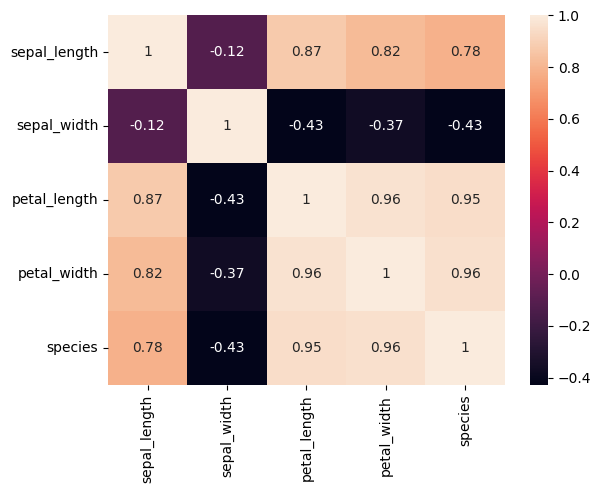

In [53]:
sns.heatmap(correlation,annot=True)
plt.show()

In [54]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [56]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [58]:
y.unique()

array([0, 1, 2])

In [59]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42,shuffle=True)

In [60]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [61]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [62]:
y_pred = classifier.predict(x_test)

In [63]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

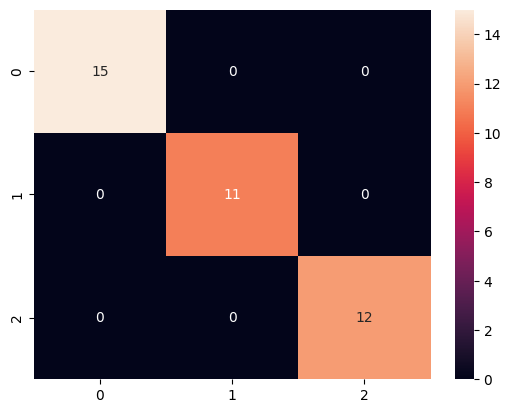

In [64]:
sns.heatmap(cm,annot=True)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [66]:
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))

Accuracy Score :
1.0


In [67]:
print("Recall Score :")
print(recall_score(y_test,y_pred,average='weighted'))

Recall Score :
1.0


In [68]:
print("F1 Score :")
print(f1_score(y_test,y_pred,average='weighted'))

F1 Score :
1.0


In [69]:
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [72]:
print("Precision Score :")
print(precision_score(y_test,y_pred,average='weighted'))

Precision Score :
1.0
